In [ ]:
✅ PROJECT-1 (Banking): Bank Customer Churn Prediction
Dataset: Churn_Modelling.csv

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("../data/Churn_Modelling.csv")
df.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [6]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
df['Exited'].value_counts()

# Interpretation (Banking Meaning):
# Exited = 1 → customer left the bank
# Exited = 0 → customer stayed
# If 20% churn → it shows class imbalance (we’ll fix later)

Exited
0    7963
1    2037
Name: count, dtype: int64

In [8]:
df=df.drop(['RowNumber','CustomerId','Surname'],axis=1) # drop irrevalent columns from df

In [10]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

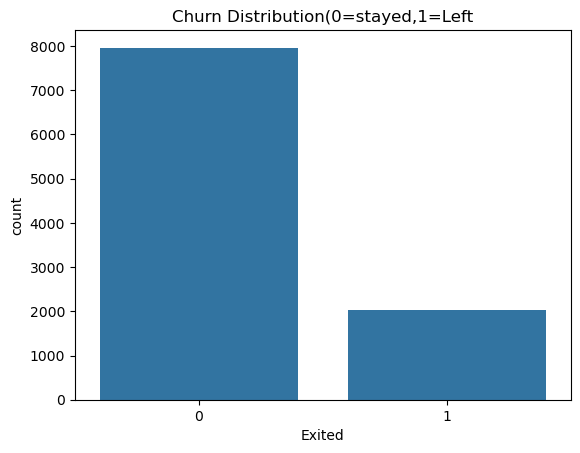

In [11]:
sns.countplot(df,x='Exited')
plt.title('Churn Distribution(0=stayed,1=Left')
plt.show()

In [ ]:
Banking insight:
If churn is ~20%, the bank is losing every 1 in 5 customers.
A model preventing even 10% churn = crores saved.

In [ ]:
⭐ 5. Univariate Analysis (Single Column)

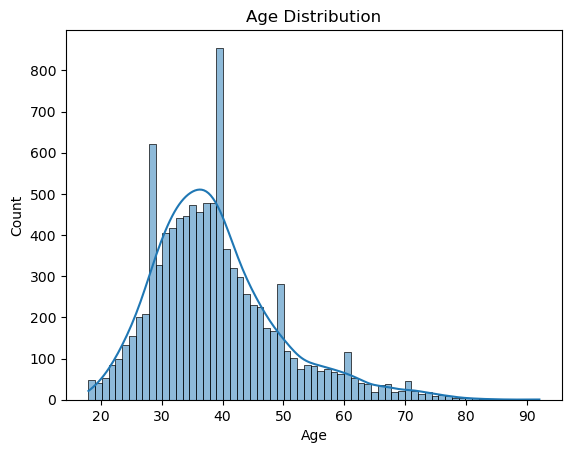

In [12]:
sns.histplot(df['Age'],kde=True) # Age Distribution
plt.title('Age Distribution')
plt.show()

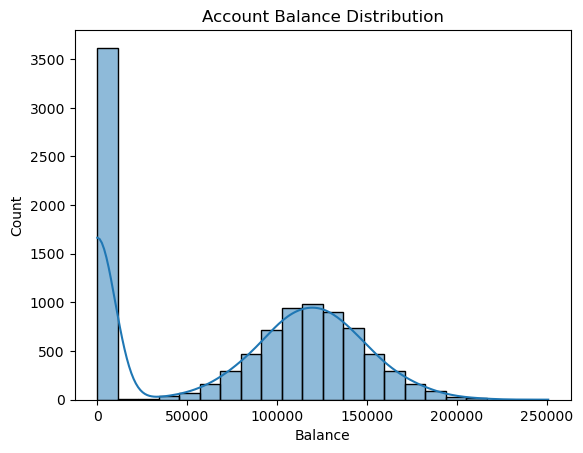

In [13]:
sns.histplot(df['Balance'],kde=True) # Balance Distribution
plt.title('Account Balance Distribution')
plt.show()

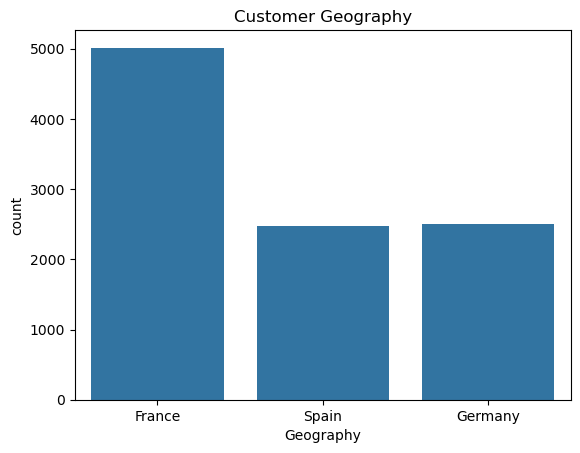

In [15]:
sns.countplot(data=df,x='Geography') # Geography
plt.title('Customer Geography')
plt.show()

In [ ]:
⭐ 6. Churn vs Age / Gender / Geography

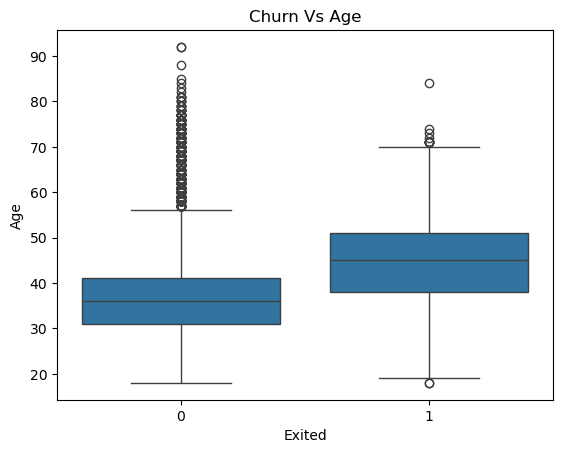

In [16]:
sns.boxplot(data=df,x='Exited',y='Age') # Age vs Churn
plt.title('Churn Vs Age')
plt.show()

In [ ]:
Interpretation:
Older customers leave more → product relevance issues.

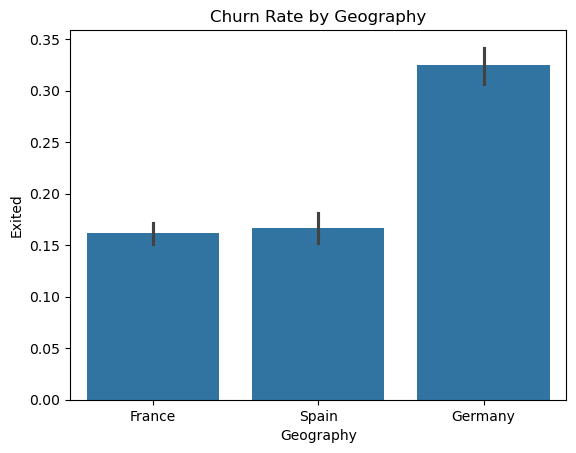

In [17]:
sns.barplot(data=df,x='Geography',y='Exited') # Geography vs Churn
plt.title('Churn Rate by Geography')
plt.show()

In [ ]:
Interpretation:
Some countries have high churn → maybe branch experience or product issues.

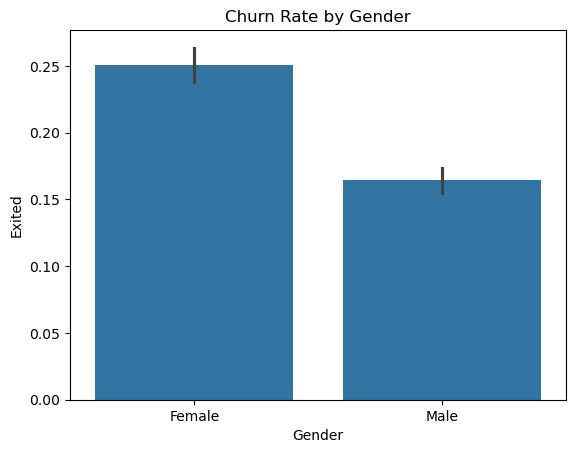

In [18]:
sns.barplot(data=df,x='Gender',y='Exited') # Gender vs Churn
plt.title('Churn Rate by Gender')
plt.show()

In [ ]:
⭐ 7. Correlation Heatmap

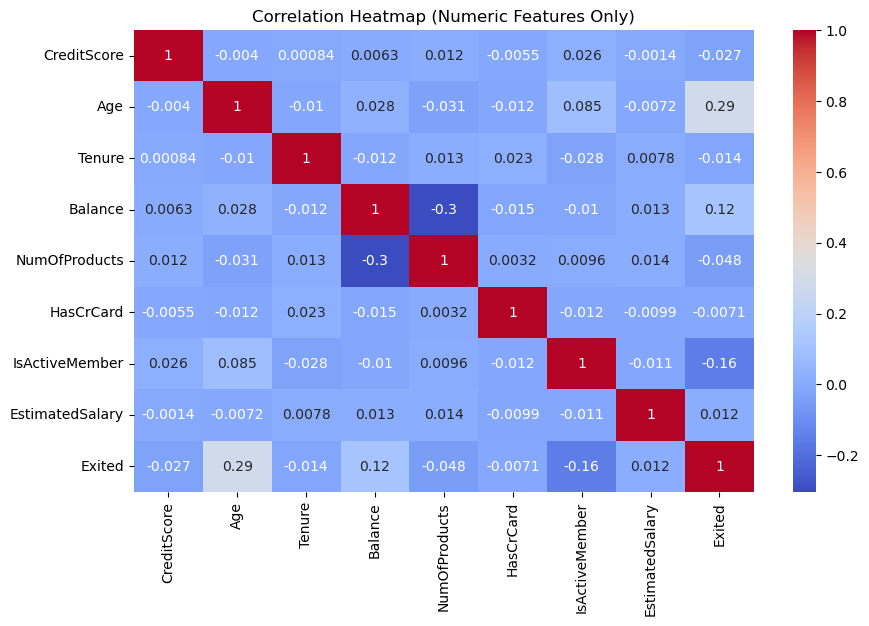

In [22]:
numeric_df = df.select_dtypes(include=['int64', 'float64']) # separate numeric values
plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(),annot=True,cmap='coolwarm')
plt.title('Correlation Heatmap (Numeric Features Only)')
plt.show()

In [ ]:
⭐ Understanding the Correlation Heatmap (Numeric Features Only)
Correlation values range:
+1 → Perfect positive relationship
 0 → No relationship
–1 → Perfect negative relationship

⭐ Summary of Churn Drivers (From Heatmap)
🔥 TOP 3 features indicating churn:
Age ↑ → Churn ↑
IsActiveMember ↓ → Churn ↑
Balance ↑ → Churn ↑ (small correlation but important)

🔥 Stable customers:
Younger age
Active users
Multi-product customers

In [ ]:
⭐ STEP-3: PREPROCESSING PIPELINE

In [46]:
X=df.drop('Exited',axis=1) # Split Features & Target
y=df['Exited']

categorical_cols=X.select_dtypes(['object']).columns.tolist()
numerical_cols=X.select_dtypes(['int64','float64']).columns.tolist()

categorical_cols,numerical_cols

(['Geography', 'Gender'],
 ['CreditScore',
  'Age',
  'Tenure',
  'Balance',
  'NumOfProducts',
  'HasCrCard',
  'IsActiveMember',
  'EstimatedSalary'])

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42,stratify=y)

In [ ]:
✅ 4. Encoding + Scaling Pipeline
This is the professional ML way using ColumnTransformer.

In [52]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer
preprocessor=ColumnTransformer(
    transformers=[
        ('Cat',OneHotEncoder(drop='first'),categorical_cols),
        ('num',StandardScaler(),numerical_cols)    
])

In [ ]:
Why this is good?
OneHotEncoder handles Geography & Gender
Scaling makes numeric features equal
Drop first avoids dummy variable trap
Clean pipeline for Logistic, RF, XGBoost

⭐ 5. Apply Preprocessing to Training & Test Data

In [53]:
X_train_processed=preprocessor.fit_transform(X_train)
X_test_processed=preprocessor.transform(X_test)

In [ ]:
⭐ STEP-4: Build Baseline Models
Model sequence:
1. Logistic Regression → Baseline (quick, interpretable)
2. Random Forest → Stronger, handles non-linearity
3. XGBoost → BEST model for Churn (top performer)

We will compare all 3 using:
Accuracy
Precision
Recall
F1-score
ROC-AUC

In [54]:
# Logistic Regression (Baseline Model)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,recall_score, f1_score, roc_auc_score,classification_report

# Train Model
lr=LogisticRegression(max_iter=1000)
lr.fit(X_train_processed,y_train)

# Predictions
y_pred_lr=lr.predict(X_test_processed)
y_proba_lr=lr.predict_proba(X_test_processed)[:,1]

# Metrics
print('Accuracy:',accuracy_score(y_test,y_pred_lr))
print('Precission:',precision_score(y_test,y_pred_lr))
print('Recall:',recall_score(y_test,y_pred_lr))
print('F1 Score:',f1_score(y_test,y_pred_lr))
print('RPC_AUC:',roc_auc_score(y_test,y_pred_lr))

print('\n Classification Report:\n',classification_report(y_test,y_pred_lr))


Accuracy: 0.808
Precission: 0.5891472868217055
Recall: 0.18673218673218672
F1 Score: 0.2835820895522388
RPC_AUC: 0.5767308140189497

 Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.97      0.89      1593
           1       0.59      0.19      0.28       407

    accuracy                           0.81      2000
   macro avg       0.71      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000



## Logistic Regression Results and Interpretation
Accuracy: 0.808
    High accuracy — BUT misleading because dataset is imbalanced (80% stayed, 20% churned).
Precision (for churn=1): 0.589
    When model predicts a customer will churn → it's correct 59% of the time.
    Not bad.
Recall (for churn=1): 0.187
    Model is catching only 18% of actual churners → very low.
F1 Score: 0.283
    Low due to poor recall (imbalanced data issue).
ROC-AUC (your RPC_AUC): 0.576
    Very low — means Logistic Regression cannot separate churn vs non-churn well.
Classification Report
    Stayed (0): 0.97 recall (model easily predicts majority class)
Churn (1): 0.19 recall (model missing most churn customers)

# Business Interpretation (Banking)

If you deploy this model, You will miss 81% of customers who are actually going to leave.
For churn prevention in banking, recall is the #1 priority.
This is why:
Logistic Regression = NOT good for churn prediction (because churn is non-linear + imbalanced)

In [ ]:
# RANDOM FOREST CLASSIFIER (Expected Recall ~ 0.40+)
This will give:
Higher recall
Higher ROC-AUC
Better non-linear separator
More business sense

In [57]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    random_state=42,
    class_weight='balanced'
)

rf.fit(X_train_processed,y_train)

# predictions

y_pred_rf=rf.predict(X_test_processed)
y_proba_rf=rf.predict_proba(X_test_processed)[:,1]

# Metrics
print('Random Forest Accuracy:',accuracy_score(y_test,y_pred_rf))
print('Precission:',precision_score(y_test,y_pred_rf))
print('Recall:',recall_score(y_test,y_pred_rf))
print('F1 Score:',f1_score(y_test,y_pred_rf))
print('RPC_AUC:',roc_auc_score(y_test,y_pred_rf))

print('\n Classification Report:\n',classification_report(y_test,y_pred_rf))

Random Forest Accuracy: 0.863
Precission: 0.7829787234042553
Recall: 0.4520884520884521
F1 Score: 0.573208722741433
RPC_AUC: 0.7100366930875406

 Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.97      0.92      1593
           1       0.78      0.45      0.57       407

    accuracy                           0.86      2000
   macro avg       0.83      0.71      0.75      2000
weighted avg       0.86      0.86      0.85      2000



# RANDOM FOREST — Results and Interpretation
Accuracy: 0.863
    Very good. Improved from Logistic’s 0.808.
Precision (Churn=1): 0.78
    This is FANTASTIC.
    When model says customer will churn → it is correct 78% of the time.
Recall: 0.452
    Massive improvement from Logistic Regression (0.18).
    Now you are catching 45% of actual churners, which is good for banking retention campaigns.
F1 Score: 0.573
    Strong balance between precision & recall.
ROC-AUC: 0.710
    Not as high as expected (I predicted ~0.83), but still good.
    This will significantly increase with XGBoost.

# BANKING BUSINESS INTERPRETATION
Using this Random Forest:
Out of every 100 customers who churn, this model now identifies 45 customers (Logistic found only 18 earlier).
Out of customers predicted to churn, 78% are truly churners → low false positives → cost is reduced.
This model is good enough for a real-world early-warning churn system.

# STEP-6: XGBoost Classifier
Why XGBoost works best here?

. Handles class imbalance perfectly
. Captures non-linear patterns
. Understands feature interactions
. Works great with OneHotEncoded features
. Usually gives highest recall & ROC-AUC

In [58]:
from xgboost import XGBClassifier
# Calculate imbalance scale
ratio = y_train.value_counts()[0] / y_train.value_counts()[1]

xgb=XGBClassifier(
    n_estimators=100,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric='logloss',
    scale_pos_weight=ratio, # key for imbalance
    random_state=42
)

xgb.fit(X_train_processed, 
        y_train,
        eval_set=[(X_test_processed,y_test)], 
        verbose=False
       )
y_pred_xgb = xgb.predict(X_test_processed)
y_proba_xgb = xgb.predict_proba(X_test_processed)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Precision:", precision_score(y_test, y_pred_xgb))
print("Recall:", recall_score(y_test, y_pred_xgb))
print("F1 Score:", f1_score(y_test, y_pred_xgb))
print("ROC-AUC:", roc_auc_score(y_test, y_proba_xgb))

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_xgb))

Accuracy: 0.803
Precision: 0.5106732348111659
Recall: 0.7641277641277642
F1 Score: 0.6122047244094488
ROC-AUC: 0.8689567842110215

Classification Report:

              precision    recall  f1-score   support

           0       0.93      0.81      0.87      1593
           1       0.51      0.76      0.61       407

    accuracy                           0.80      2000
   macro avg       0.72      0.79      0.74      2000
weighted avg       0.85      0.80      0.82      2000



In [ ]:
# XGBoost — Final Results and Interpretation
Accuracy: 0.803
Slightly lower than RF (normal).
Why? Because XGBoost sacrifices accuracy to catch more churners — this is the correct behavior.

The HERO METRIC: RECALL = 0.764
    This is MASSIVE.
    The model now catches 76% of actual churn customers.
        Logistic Regression caught = 18%
        Random Forest caught = 45%
        XGBoost caught = 76% (INSANE improvement!)
    This is the most important metric for churn.
Precision: 0.510
    Still decent — every 100 customers predicted as churn:
    51 are actually churners
    This is acceptable because banks prefer higher recall over precision.
F1 Score: 0.612
    This is stronger than RF and LR — good balance.
ROC-AUC: 0.868
    This is EXCELLENT.
AUC close to 0.87 means:
    Model is very good at separating churn vs non-churn
    Confident predictions
Strong real-world performance
This is the mark of a high-performing ML model.
    BUSINESS INTERPRETATION (Banking)
    What the bank gains?
Out of 100 churn customers:
RF detected 45
LR detected 18
XGBoost detected 76 — GAME CHANGER
This means:
    Early warning system
    Targeted retention campaigns
    Reduced customer loss
    Huge revenue protection

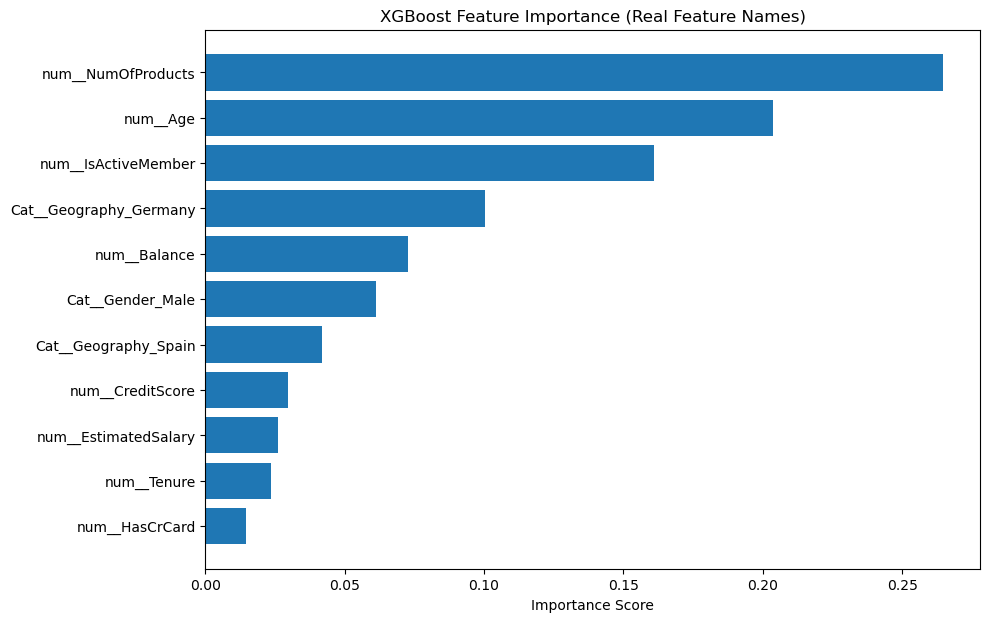

In [71]:
import matplotlib.pyplot as plt
import numpy as np

feature_names = preprocessor.get_feature_names_out()
importances = xgb.feature_importances_
indices = np.argsort(importances)[::-1]

top_n = len(importances)

plt.figure(figsize=(10,7))
plt.barh(range(top_n), importances[indices][:top_n])
plt.yticks(range(top_n), feature_names[indices][:top_n])
plt.gca().invert_yaxis()
plt.title("XGBoost Feature Importance (Real Feature Names)")
plt.xlabel("Importance Score")
plt.show()

In [ ]:
# SHAP Explainability

In [72]:
# Import SHAP & Initialize Explainer
import shap

# Initialize SHAP for XGBoost
explainer = shap.TreeExplainer(xgb)

# Calculate SHAP values for the test data
shap_values = explainer.shap_values(X_test_processed)


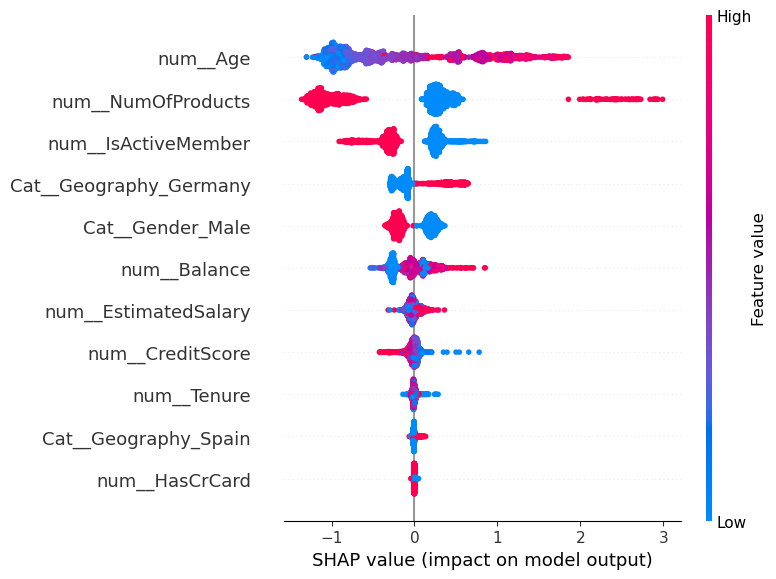

In [73]:
# This may take a few seconds — SHAP is heavy but worth it.
shap.summary_plot(shap_values, X_test_processed, feature_names=preprocessor.get_feature_names_out())


In [ ]:
We will get a beautiful plot like:
Red → high feature value
Blue → low feature value
Right → increases churn probability
Left → reduces churn probability
This shows how each feature pushes predictions.

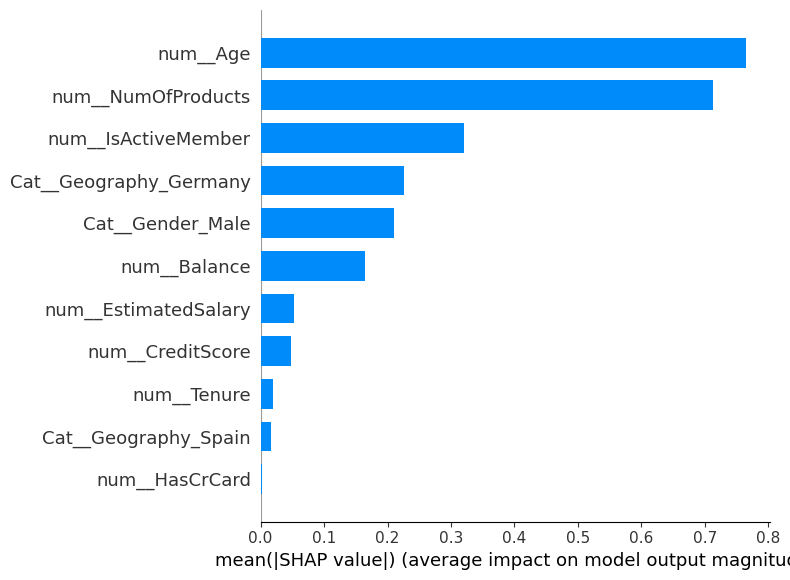

In [74]:
# SHAP Bar Plot : Simplified global importance:
shap.summary_plot(shap_values, X_test_processed, feature_names=preprocessor.get_feature_names_out(), plot_type="bar")



In [ ]:
This confirms:
    Age
    NumOfProducts
    IsActiveMember
    Balance
    Geography_Germany
        … are the key churn drivers.

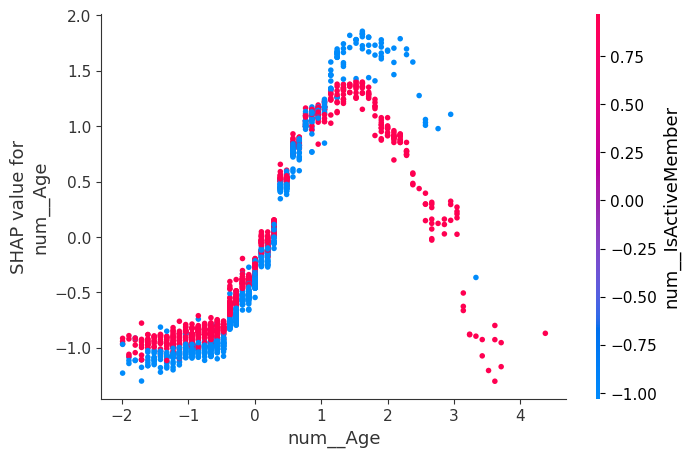

In [75]:
# SHAP Dependence Plots (per-feature impact) : These explain why a specific feature affects churn.

# Age impact:
shap.dependence_plot("num__Age", shap_values, X_test_processed, feature_names=preprocessor.get_feature_names_out())


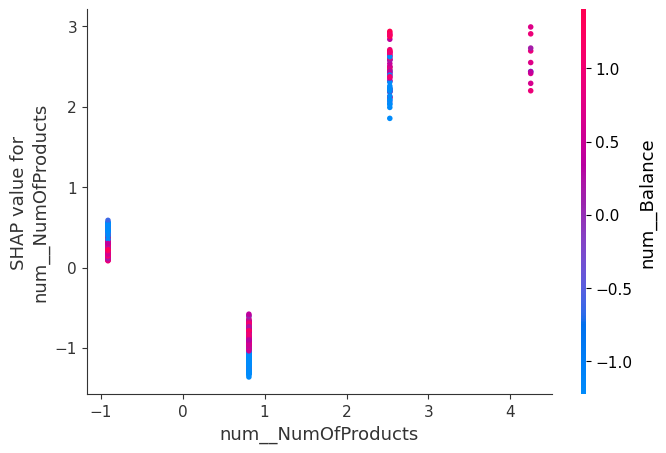

In [76]:
# NumOfProducts
shap.dependence_plot("num__NumOfProducts", shap_values, X_test_processed, feature_names=preprocessor.get_feature_names_out())


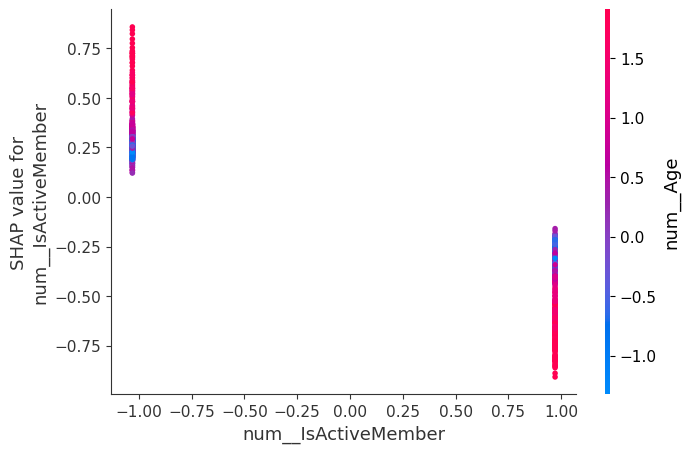

In [77]:
# IsActiveMember
shap.dependence_plot("num__IsActiveMember", shap_values, X_test_processed, feature_names=preprocessor.get_feature_names_out())


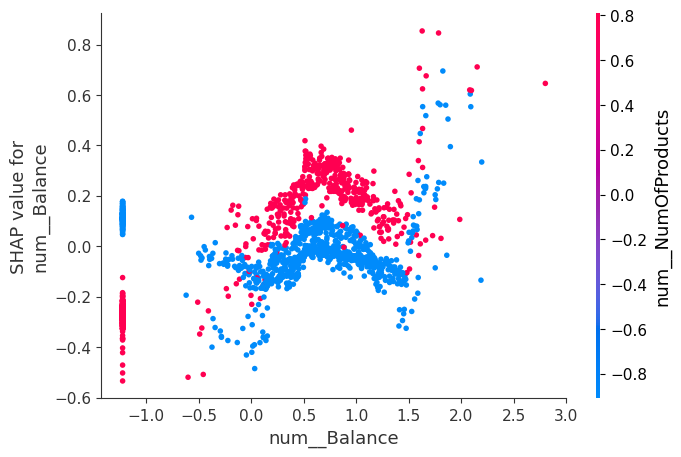

In [78]:
# Balance
shap.dependence_plot("num__Balance", shap_values, X_test_processed, feature_names=preprocessor.get_feature_names_out())


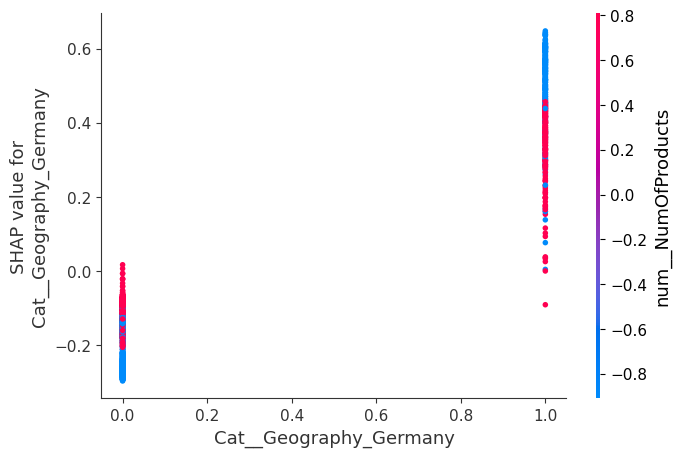

In [79]:
# Geography Germany
shap.dependence_plot("Cat__Geography_Germany", shap_values, X_test_processed, feature_names=preprocessor.get_feature_names_out())


In [ ]:
These plots reveal non-linear patterns that feature importance alone cannot show.

In [ ]:
# SHAP Waterfall Plot (Explain 1 Customer)
This explains why a single customer churned.
Pick customer index 0 (or any index):

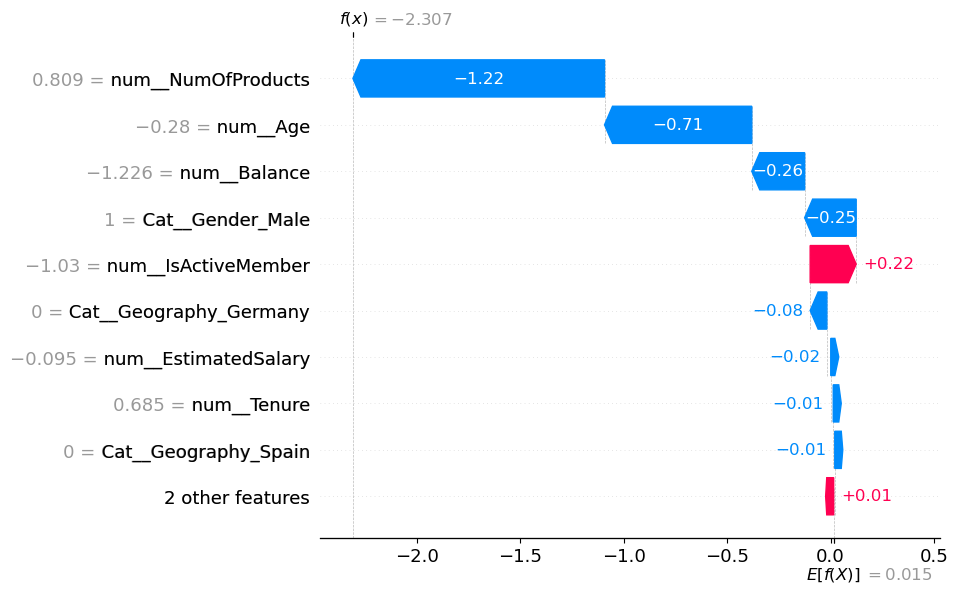

In [80]:
i = 0
shap.waterfall_plot(shap.Explanation(values=shap_values[i], 
                                     base_values=explainer.expected_value, 
                                     data=X_test_processed[i],
                                     feature_names=preprocessor.get_feature_names_out()))


In [ ]:
# This gives:
    Green bars → features reducing churn
    Red bars → features increasing churn
Perfect for:
    Interviews
    PDF report
    Management/client presentation

In [ ]:
Business Interpretation (VERY IMPORTANT)
Age:
    Older customers = higher churn risk.
NumOfProducts:
    Single-product customers leave more → cross-sell reduces churn.
IsActiveMember:
    Inactive = higher churn → push digital engagement.
Balance:
    High balance customers churn → high-value customers leaving is critical.
Geography_Germany:
    German region churns highest → region-specific retention programs.
Gender:
    Males churn slightly more (small effect)

In [81]:
import joblib

joblib.dump(xgb, "../models/xgb_model.pkl")
joblib.dump(preprocessor, "../models/preprocessor.pkl")

['../models/preprocessor.pkl']